In [1]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
import time

plt.rcParams.update({'font.size': 18})

In [2]:
def h5file2corr(h5_file, NFFT):
    print ("Reading",h5_file)
    with h5py.File(h5_file, 'r') as hf: 
        fc = hf["data"].attrs['fc']
        fs = hf["data"].attrs['fs']
        c  = hf["data"].attrs['c']
        len_data = hf["data/timestamps"][()].shape[0]
        print (len_data)
        Nsamp = int(c)

        auto11 = np.zeros(NFFT, dtype=np.complex64)
        auto22 = np.zeros(NFFT, dtype=np.complex64)
        cross12 = np.zeros(NFFT, dtype=np.complex64)

        for i in range(len_data):
            a = hf["data/samples"][i][0][:]
            b = hf["data/samples"][i][1][:]

            for j in range(int(Nsamp/NFFT)):
                c1_fft = np.fft.fft(a[j*NFFT:(j+1)*NFFT])
                c2_fft = np.fft.fft(b[j*NFFT:(j+1)*NFFT])
                auto11 = auto11 + c1_fft*np.conj(c1_fft)
                auto22 = auto22 + c2_fft*np.conj(c2_fft)
                cross12 = cross12 + c1_fft*np.conj(c2_fft)

    auto11 = np.fft.fftshift(auto11)
    auto22 = np.fft.fftshift(auto22)
    cross12 = np.fft.fftshift(cross12)
    freqs = np.fft.fftshift(np.fft.fftfreq(NFFT, 1/fs)+fc)
    hf.close()
    return freqs, auto11, auto22, cross12


In [3]:
freqs_open, auto11_open, auto22_open, cross12_open     = h5file2corr("20240217-155230_pluto_open.h5", 512)
freqs_short, auto11_short, auto22_short, cross12_short = h5file2corr("20240217-155301_pluto_short.h5", 512)
freqs_load, auto11_load, auto22_load, cross12_load     = h5file2corr("20240217-155333_pluto_load.h5", 512)
freqs_ksr100, auto11_ksr100, auto22_ksr100, cross12_ksr100 = h5file2corr("20240217-155450_pluto_ksr100.h5", 512)

Reading 20240217-155230_pluto_open.h5
100
Reading 20240217-155301_pluto_short.h5
100
Reading 20240217-155333_pluto_load.h5
100
Reading 20240217-155450_pluto_ksr100.h5
100


Text(0.5, 0, 'Freq (MHz)')

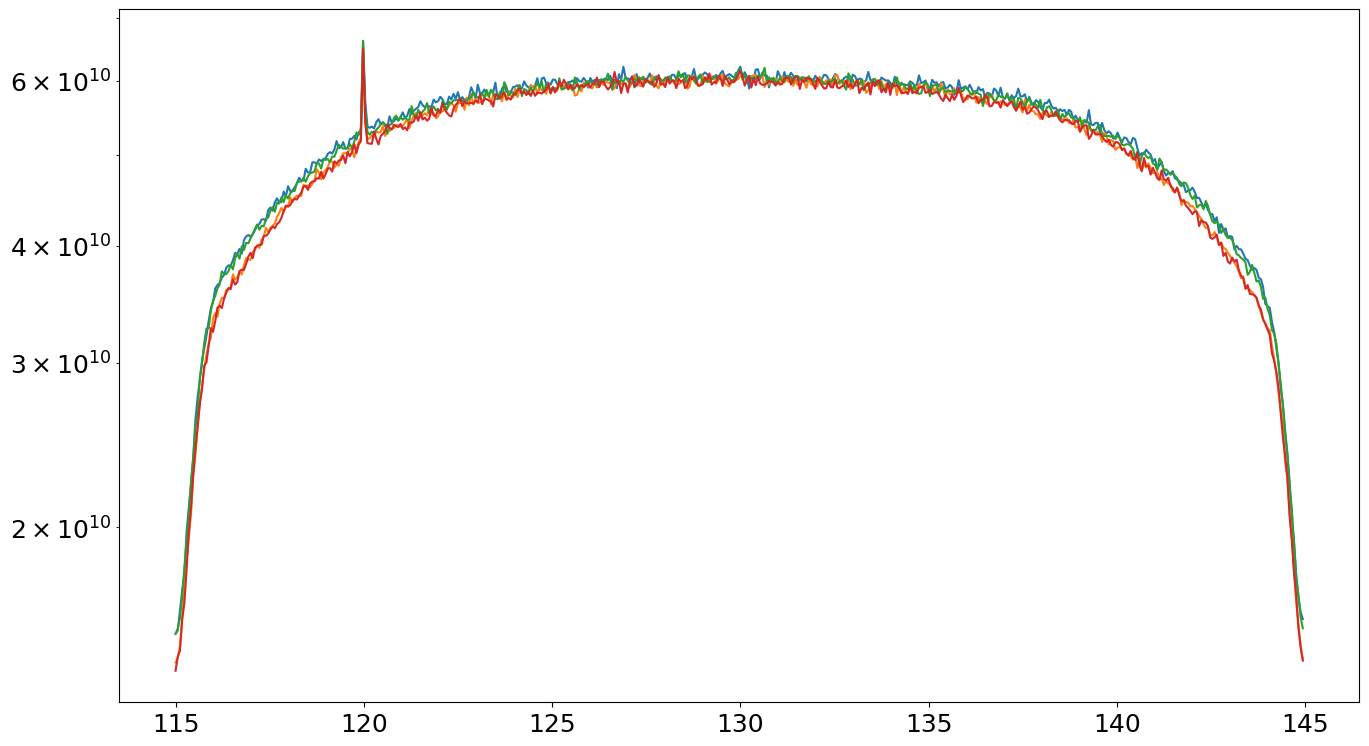

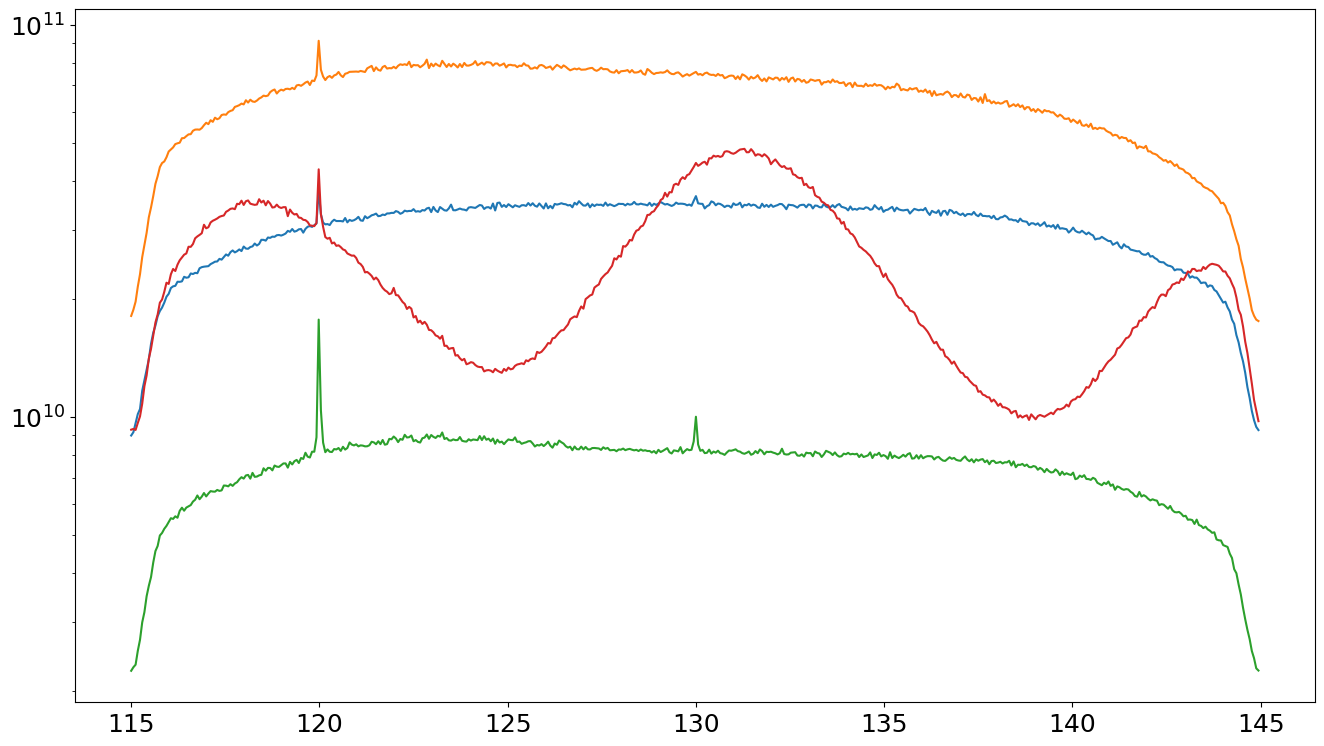

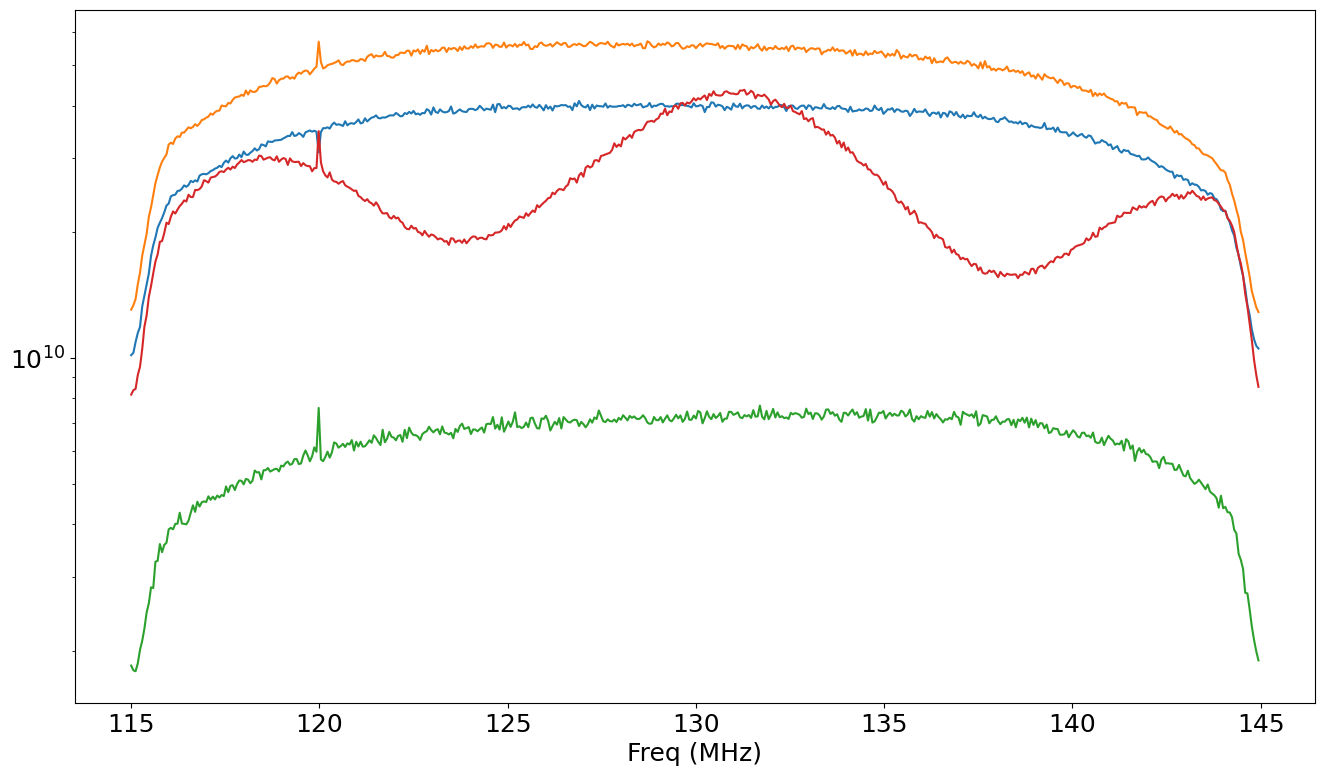

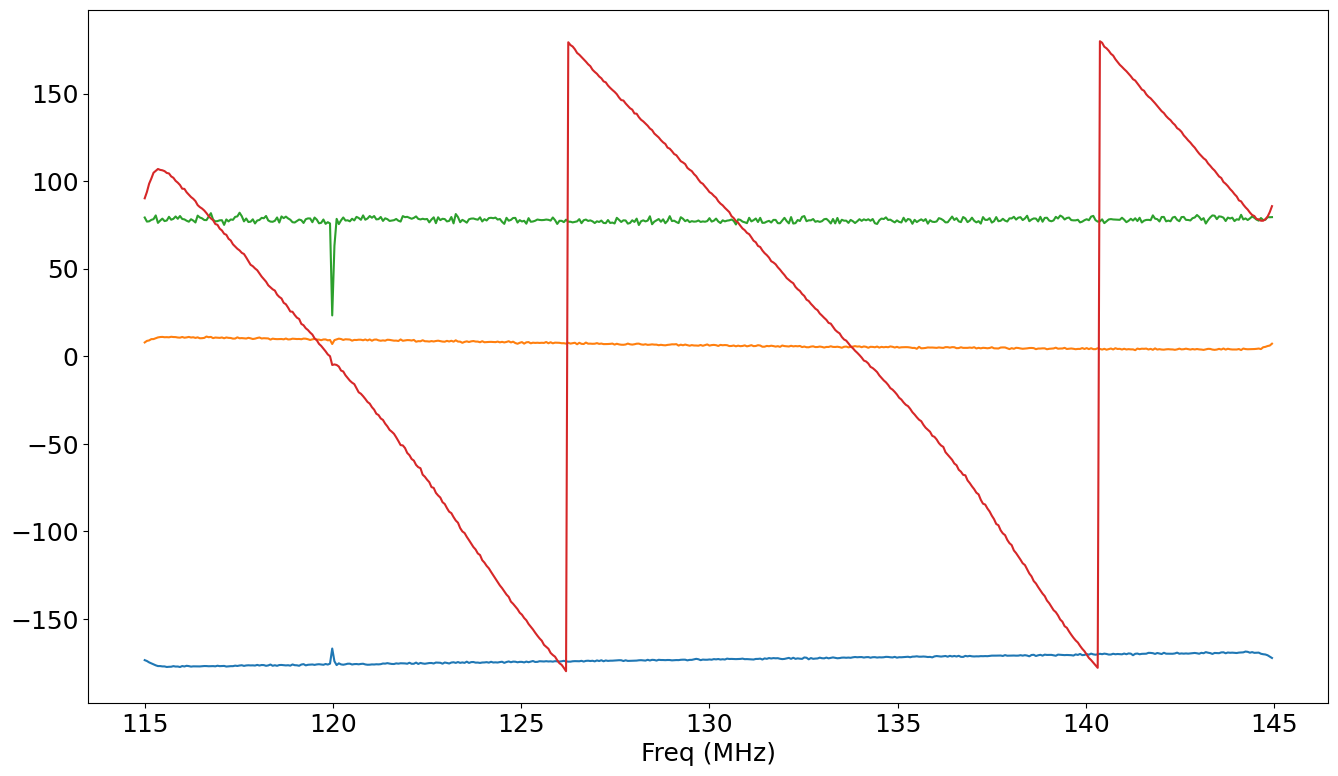

In [7]:
plt.figure(figsize=(16,9))
plt.semilogy(freqs_open/1e6, np.abs(auto22_open))
plt.semilogy(freqs_open/1e6, np.abs(auto22_short))
plt.semilogy(freqs_open/1e6, np.abs(auto22_load))
plt.semilogy(freqs_open/1e6, np.abs(auto22_ksr100))

plt.figure(figsize=(16,9))
plt.semilogy(freqs_open/1e6, np.abs(auto11_open))
plt.semilogy(freqs_open/1e6, np.abs(auto11_short))
plt.semilogy(freqs_open/1e6, np.abs(auto11_load))
plt.semilogy(freqs_open/1e6, np.abs(auto11_ksr100))

plt.figure(figsize=(16,9))
plt.semilogy(freqs_open/1e6, np.abs(cross12_open))
plt.semilogy(freqs_open/1e6, np.abs(cross12_short))
plt.semilogy(freqs_open/1e6, np.abs(cross12_load))
plt.semilogy(freqs_open/1e6, np.abs(cross12_ksr100))

plt.xlabel("Freq (MHz)")

plt.figure(figsize=(16,9))
# plt.plot(freqs_open/1e6, np.unwrap(np.angle(cross12_open)))
# plt.plot(freqs_open/1e6, np.unwrap(np.angle(cross12_short)))
# plt.plot(freqs_open/1e6, np.unwrap(np.angle(cross12_load)))
# plt.plot(freqs_open/1e6, np.unwrap(np.angle(cross12_ksr100)))

plt.plot(freqs_open/1e6, (np.angle(cross12_open))*180/np.pi)
plt.plot(freqs_open/1e6, (np.angle(cross12_short))*180/np.pi)
plt.plot(freqs_open/1e6, (np.angle(cross12_load))*180/np.pi)
plt.plot(freqs_open/1e6, (np.angle(cross12_ksr100))*180/np.pi)

plt.xlabel("Freq (MHz)")
